<a href="https://colab.research.google.com/github/lorek/ZPS2020/blob/main/docs/Mutual_info_z6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from pylab import plot, show, figure
from functools import partial

# **Mutual Information / Information Gain**


Spis treści:

1. Feature Selection - wprowadzenie
2. Działanie Mutual Information
* Entropia
* Mutual Information (informacja wzajemna)
3. Information Gain
4. Wykorzystanie w machine learningu
5. Funkcja sklearn.feature_selection.mutual_info_classif()



---


> #### 1. **Feature Selection - wprowadzenie**


**Feature Selection** (dosłownie “wybór cech”) to sposób zmniejszania rozmiaru zbioru danych, poprzez pozbycie się zmiennych, które zawierają **zbędne** lub **nieistotne** cechy (należy zaznaczyć, że “zbędne” oraz “nieistotne” to dwie zupełnie różne rzeczy). Stosuje się go często do danych, które zawierają zbyt wiele cech (zmiennych) w stosunku do ilości próbek (zachodzi tzw. overfitting).

Ostatnio omawiane były metody procesu Feature Extraction, które tworzą odpowiednie nowe zmienne, natomiast Feature Selection różni się tym, że nie transformuje wejściowych danych, jedynie wybiera z nich podzbiór najistotniejszych zmiennych, przenoszących najwięcej potrzebnych informacji. Feature Selection dzieli się głównie na metody opakowujące, metody osadzone i metody filtrujące. Mutual Information, jak i Relief, należą do tych ostatnich.

>#### 2. **Różnica między Information Gain i Mutual Information**

> * **Entropia**

**Entropia** to średnia ilość informacji, przypadająca na pojedynczą wiadomość ze źródła informacji. Innymi słowy jest to średnia ważona ilości informacji niesionej przez pojedynczą wiadomość, gdzie wagami są prawdopodobieństwa nadania poszczególnych wiadomości.

Jej wartość obliczamy ze wzoru:
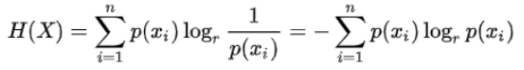
gdzie X to zmienna losowa o zbiorze wartości {x1,...,xn}, p(xi) to prawdopodobieństwo zajścia zdarzenia xi, a r to podstawa logarytmu (przy informacji wzajemnej używamy r=2 i podajemy wartość w bitach).

Entropię interpretuje się jako **niepewność** wystąpienia danego zdarzenia elementarnego w następnej chwili. Na przykład jeżeli jakieś zdarzenie w zbiorze danych występuje z prawdopodobieństwem 1 to entropia układu jest równa 0 ponieważ nie ma żadnej niepewności, wiadomo co się stanie. Natomiast jeśli zdarzenia są tak samo prawdopodobne, to entropia jest maksymalna - np. gdy rzucamy symetryczną monetą to nie mamy pojęcia co wypadnie, niepewność jest maksymalna więc entropia też (jeśli policzymy jej wartość używając logarytmu o podstawie 2 otrzymamy wynik 1, zdarzenie to ma 1 bita entropii na rzut).

Przyda się również pojęcie *entropii warunkowej* - mierzy ile wynosi entropia nieznanej zmiennej losowej Y, jeśli znamy wartość innej zmiennej losowej X:
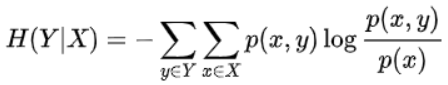
oraz pojęcie *entropii produktowej* - mierzy niepewność w zbiorze zmiennych:
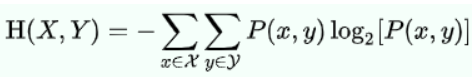

> * **Mutual Information (informacja wzajemna)**

**Informacja wzajemna** (dalej: MI) to w teorii informacji miara zależności pomiędzy dwiema zmiennymi losowymi, podajemy ją w bitach. Pojęcie to zostało wprowadzone już w 1948 r. przez Claude Shannona.

Intuicyjnie MI mierzy **ile informacji dzielą dwie zmienne**, tzn. ile informacji o jednej zmiennej można poznać, jeśli znamy drugą zmienną. Innymi słowy o ile poznanie jednej zmiennej zmniejsza niepewność o drugiej. Na przykład jeżeli dwie zmienne są niezależne to ich MI wynosi 0, bo oczywiście nie dzielą żadnej informacji. Natomiast jeśli dwie zmienne są jednakowe, to ich MI jest maksymalna, bo dzielą całą informację, tzn. MI jest równa entropii każdej z tych zmiennych.
Formalna definicja:
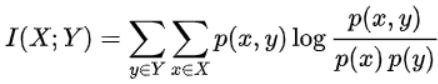
gdzie p(x,y) to wspólny rozkład prawdopodobieństwa X i Y, a p(x) i p(y) to ich rozkłady brzegowe.
Dla ciągłych rozkładów sumy zastępujemy całkami, ale w przypadku naszych danych interesują nas zmienne dyskretne.

MI można zdefiniować też za pomocą entropii (bardziej intuicyjnie):
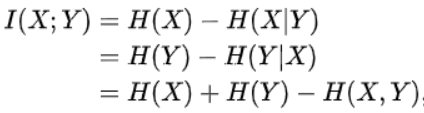
H(X) i H(Y) oznaczają entropie, H(X|Y) i H(Y|X) oznaczają entropie warunkowe, a H(X,Y) entropię produktową.
By łatwiej było to zapamiętać można zauważyć analogię do sumy, różnicy i przekroju teoriomnogościowych:
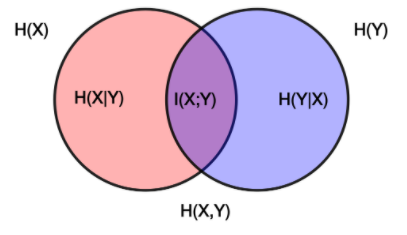
Informacja wzajemna mówi nam zatem o ile zmniejsza się entropia jednej zmiennej, jeśli znamy drugą.


> * **Information Gain** 

**Information Gain** (“zysk informacji”,dalej: IG) - w teorii informacji jest to ilość informacji zdobytej o zmiennej losowej na podstawie obserwacji innej zmiennej, im wyższa wartość IG tym niższa entropia próbki. Często używa się zamiennie terminów Information Gain i Mutual Information.

IG zwykle używa się do konstruowania *drzew decyzyjnych* na podstawie zbioru danych treningowych oceniając zysk informacji dla każdej zmiennej i wybierając zmienną, która maksymalizuje zysk informacji, co z kolei minimalizuje entropię i najlepiej dzieli zbiór danych na grupy w celu skutecznej klasyfikacji.

Z kolei jeśli używa się tego w kontekście *zależności między zmiennymi* przy Feature Selection, to używa się nazwy MI. 

Technicznie, jeśli zastosujemy IG i MI do tych samych danych, policzą nam one to samo.

> #### 3. **Wykorzystanie w machine learningu**

Przypomnijmy sobie, że w metodzie Feature Selection chcemy pozbyć się danych, które są zbędne, nie wnoszą istotnych informacji. Natomiast MI pozwala nam policzyć, jak wiele informacji dzielą ze sobą dane (zmienne). Naturalnie widać, jak możemy wykorzystać MI do pozbycia się zbędnych danych - jeżeli informacja wzajemna pewnych dwóch zmiennych jest wysoka, tzn. znając jedną z tych zmiennych możemy poznać w dużym stopniu tę drugą, to możemy pozbyć się jednej z tych zmiennych, nie tracąc wiele informacji ogólnie.

Którą z dwóch zmiennych usunąć? Najpierw należy policzyć wszystkie wartości MI w parach zmiennych. Następnie, jeśli wartość ta dla jakiejś pary cech przekracza ustalony próg, należy usunąć tę, która ma większą średnią bezwzględną wartość IM z innymi cechami. 
W ten sposób pozbywamy się zmiennych **zbędnych**. 

Aby pozbyć się informacji **nieistotnych** używamy IM w nieco inny sposób. W treningowym zbiorze danych posiadamy zmienną będącą tzw. *zmienną docelową* (zawarte są w niej informacje o klasach danych) i wykorzystujemy ją do wyboru cech, które mają pozostać w zbiorze danych o zredukowanym wymiarze. Wskazuje ona jak powinny być zaklasyfikowane obserwacje i gdy zmienne mają wysoką informację wzajemną ze zmienną docelową, sugeruje to, że dają one dużo informacji na temat klasy, z której pochodzi obserwacja. Jeśli ta informacja wzajemna jest bardzo niska zwykle możemy pozbyć się tej zmiennej, bo najprawdopodobniej nie wnosi ona wiele do naszego problemu. Oczywiście nie jest to takie proste i może się zdarzyć, że usuniemy zmienną która w połączeniu z inną zmienną daje ważne informacje, jednak w praktyce zwykle stosuje się ten sposób z powodzeniem.

**Zalety**: Niektóre algorytmy nie są odporne na zależne zmienne, więc usunięcie ich może zwiększyć wydajność. Metoda MI opiera się również na silnej intuicji: podobne dane powodują obecność zbędnych informacji. Najczęściej stosowanymi metodami filtrującymi z Feature Selection są te używające IM oraz korelację i podczas gdy korelacja nie obejmuje silnych nieliniowych zależności, to metody używające IM mogą wychwycić wszelkiego rodzaju zależności statystyczne.

**Wady**: Przy pozbywaniu się danych zbędnych, ręcznie ustawiamy próg, od którego uznajemy informacje za wystarczająco bliskie, by jedną z nich usunąć. Jeśli ustawimy próg zbyt nisko, ryzykujemy utratę przydatnych informacji. Przy pozbywaniu się danych nieistotnych, może się zdarzyć, że usuniemy daną która daje dużo informacji z połączeniu z inną, co da nam nierzeczywisty wynik. Wcześniej wspomniano też, że użycie IM może być lepsze niż korelacji, jednak do tego by IM działało lepiej, potrzebujemy więcej próbek. 
Najlepszym sposobem byłoby wybranie od razu całego podzbioru zmiennych, które ma maksymalną MI ze zmienną docelową, jednak obliczanie i maksymalizowanie wartości MI dla większej liczby zmiennych jest bardzo trudne i długie.

> #### 4. **Funkcja sklearn.feature_selection.mutual_info_classif() i przykłady**

**MNIST**

Klasy: 10

Ilość obserwacji: 1797

Wymiar: 64


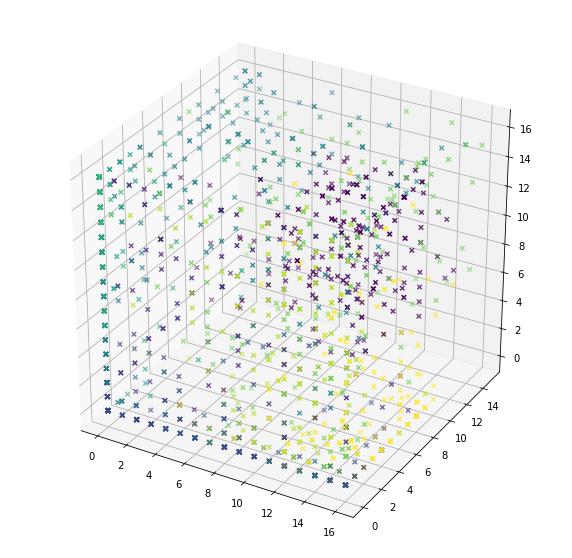

In [ ]:
data = datasets.load_digits()
x = data['data']
y = data['target']

fs = SelectKBest(score_func=mutual_info_classif, k=3)
new = fs.fit_transform(x,y)

fig = figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new[:,0], new[:,1], new[:,2], c=y, marker ="x")
print('n_neighbors=3')
show()


n_neighbors=3


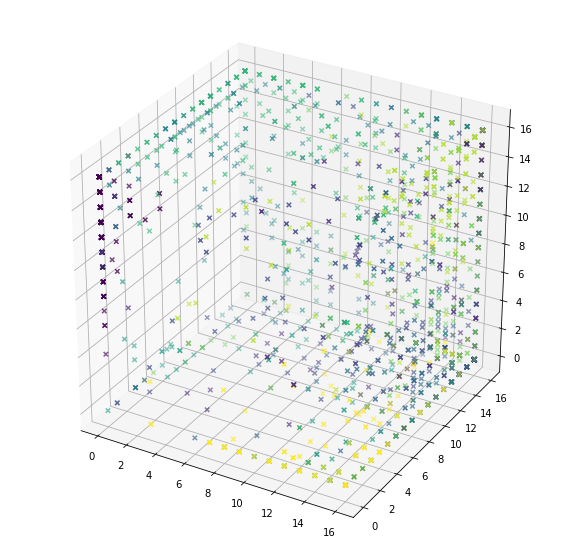

In [ ]:
data = datasets.load_digits()
x = data['data']
y = data['target']

fs = SelectKBest(score_func=partial(mutual_info_classif, n_neighbors=100), k=3)
new = fs.fit_transform(x,y)

fig = figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new[:,0], new[:,1], new[:,2], c=y, marker ="x")
print('n_neighbors=100')
show()

In [ ]:
data = datasets.load_digits()
x = data['data']
y = data['target']

fs = SelectKBest(score_func=partial(mutual_info_classif, n_neighbors=1000), k=3)
new = fs.fit_transform(x,y)

fig = figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new[:,0], new[:,1], new[:,2], c=y, marker ="x")
print('n_neighbors=1000')
show()

**IRIS**

Klasy: 3

Ilość obserwacji: 150

Wymiar: 4

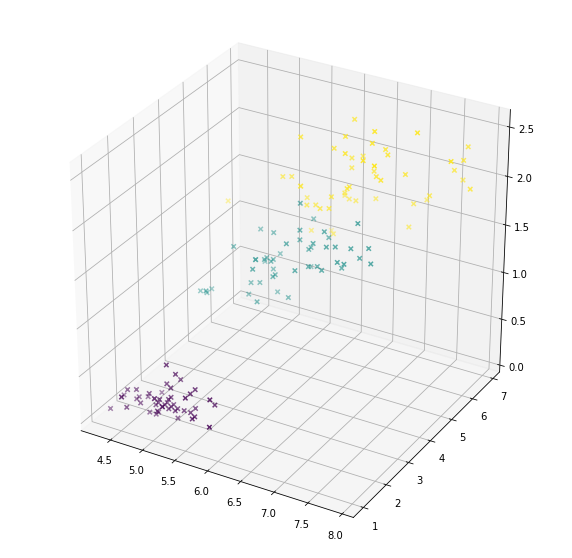

In [ ]:
x,y = datasets.load_iris(return_X_y=True)

fs = SelectKBest(score_func=mutual_info_classif, k=3)
new = fs.fit_transform(x,y)

fig = figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new[:,0], new[:,1], new[:,2], c=y, marker ="x")
print('n_neighbors=3')
show()

n_neighbors=100


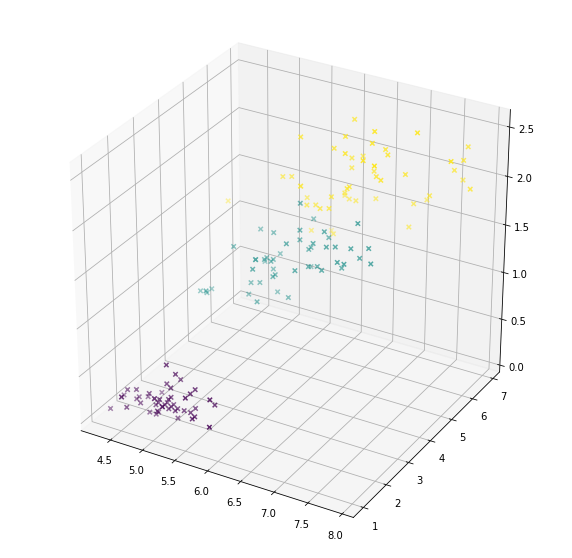

In [ ]:
fs2 = SelectKBest(score_func=partial(mutual_info_classif, n_neighbors=100), k=3)
new = fs.fit_transform(x,y)
fig = figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new[:,0], new[:,1], new[:,2], c=y, marker ="x")
print('n_neighbors=100')
show()

**BREAST_CANCER**

Klasy: 2

Ilość obserwacji: 569

Wymiar: 30

n_neighbors=3


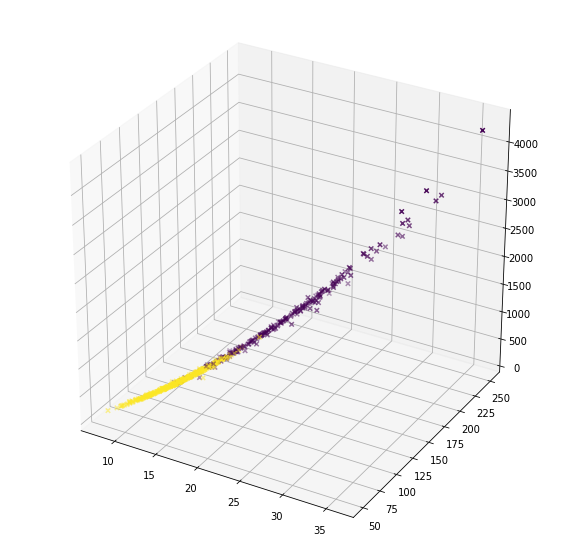

In [ ]:
x,y = datasets.load_breast_cancer(return_X_y=True)

fs = SelectKBest(score_func=partial(mutual_info_classif, n_neighbors=5), k=3)
new = fs.fit_transform(x,y)

fig = figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new[:,0], new[:,1], new[:,2], c=y, marker ="x")
print('n_neighbors=5')
show()

n_neighbors=100


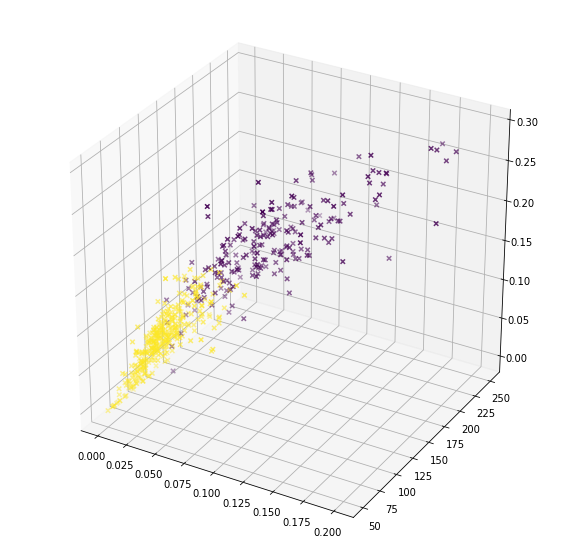

In [ ]:
x,y = datasets.load_breast_cancer(return_X_y=True)

fs = SelectKBest(score_func=partial(mutual_info_classif, n_neighbors=100), k=3)
new = fs.fit_transform(x,y)

fig = figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(new[:,0], new[:,1], new[:,2], c=y, marker ="x")
print('n_neighbors=100')
show()

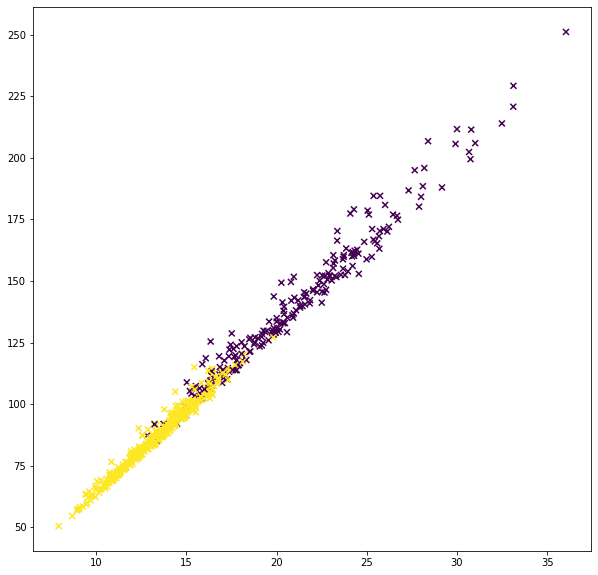

In [ ]:
x,y = datasets.load_breast_cancer(return_X_y=True)

fs = SelectKBest(score_func=partial(mutual_info_classif, n_neighbors=3), k=3)
new = fs.fit_transform(x,y)

fig = figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(new[:,0], new[:,1], c=y, marker ="x")
print('n_neighbors=3')
show()

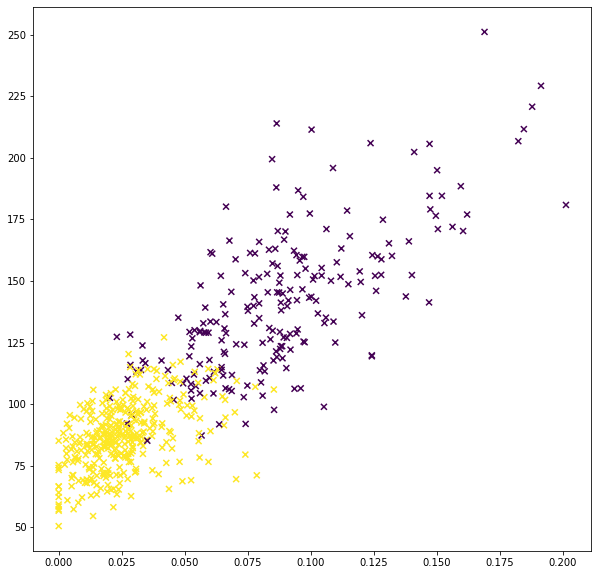

In [ ]:
x,y = datasets.load_breast_cancer(return_X_y=True)

fs = SelectKBest(score_func=partial(mutual_info_classif, n_neighbors=100), k=3)
new = fs.fit_transform(x,y)

fig = figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(new[:,0], new[:,1], c=y, marker ="x")
print('n_neighbors=100')
show()